In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [40]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [7]:
data = engine.execute("Select * from station")
for each in data:
    print(each)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


In [8]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [9]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [16]:
us9281_data = session.query(Measurement).filter(Measurement.station == 'USC00519281').filter(all()
for edata in us9281_data:
    print(f'{edata.station}, {edata.date}, {edata.prcp}')

USC00519281, 2010-01-01, 0.15
USC00519281, 2010-01-02, 0.0
USC00519281, 2010-01-03, 0.0
USC00519281, 2010-01-04, 0.0
USC00519281, 2010-01-05, 0.0
USC00519281, 2010-01-06, 0.01
USC00519281, 2010-01-07, 0.17
USC00519281, 2010-01-08, 0.0
USC00519281, 2010-01-09, 0.0
USC00519281, 2010-01-10, 0.0
USC00519281, 2010-01-11, 0.03
USC00519281, 2010-01-12, 0.0
USC00519281, 2010-01-13, 0.0
USC00519281, 2010-01-14, 0.0
USC00519281, 2010-01-15, 0.0
USC00519281, 2010-01-16, 0.0
USC00519281, 2010-01-17, 0.0
USC00519281, 2010-01-18, 0.0
USC00519281, 2010-01-19, 0.0
USC00519281, 2010-01-20, 0.0
USC00519281, 2010-01-21, 0.16
USC00519281, 2010-01-22, 0.0
USC00519281, 2010-01-23, 0.0
USC00519281, 2010-01-24, 0.0
USC00519281, 2010-01-25, 0.0
USC00519281, 2010-01-26, 0.01
USC00519281, 2010-01-27, 0.31
USC00519281, 2010-01-28, 0.37
USC00519281, 2010-01-29, 0.75
USC00519281, 2010-01-30, 2.17
USC00519281, 2010-01-31, 0.69
USC00519281, 2010-02-01, 0.02
USC00519281, 2010-02-02, 0.0
USC00519281, 2010-02-03, 0.37
U

USC00519281, 2015-01-12, 0.0
USC00519281, 2015-01-13, 0.0
USC00519281, 2015-01-14, 0.0
USC00519281, 2015-01-15, 0.0
USC00519281, 2015-01-16, 0.01
USC00519281, 2015-01-17, 0.0
USC00519281, 2015-01-18, 0.0
USC00519281, 2015-01-19, 0.0
USC00519281, 2015-01-20, 0.0
USC00519281, 2015-01-21, 0.0
USC00519281, 2015-01-22, 0.0
USC00519281, 2015-01-23, 0.0
USC00519281, 2015-01-24, 0.18
USC00519281, 2015-01-25, 0.78
USC00519281, 2015-01-26, 0.77
USC00519281, 2015-01-27, 0.0
USC00519281, 2015-01-28, 0.06
USC00519281, 2015-01-29, 0.0
USC00519281, 2015-01-30, 0.09
USC00519281, 2015-01-31, 0.0
USC00519281, 2015-02-01, 0.02
USC00519281, 2015-02-02, 0.0
USC00519281, 2015-02-03, 0.0
USC00519281, 2015-02-04, 1.29
USC00519281, 2015-02-05, 0.0
USC00519281, 2015-02-06, 0.0
USC00519281, 2015-02-07, 0.0
USC00519281, 2015-02-08, 0.0
USC00519281, 2015-02-09, 0.0
USC00519281, 2015-02-10, 0.24
USC00519281, 2015-02-11, 0.0
USC00519281, 2015-02-12, 0.0
USC00519281, 2015-02-13, 0.0
USC00519281, 2015-02-14, 0.21
USC0

# Exploratory Precipitation Analysis

In [43]:
# Find the most recent date in the data set.
max_date = session.query(func.max(Measurement.date)).first()

#print(max_date)

for max_each in max_date:
    date_last_year = max_each



In [44]:
date_last_year = datetime.strptime(date_last_year,'%Y-%m-%d') - dt.timedelta(days=365)

#print(date_last_year)




2016-08-23 00:00:00


In [127]:
np.arange(np.datetime64("2017-07-15"), np.datetime64("2017-08-23"), np.timedelta64(5, 'D'))

array(['2017-07-15', '2017-07-20', '2017-07-25', '2017-07-30',
       '2017-08-04', '2017-08-09', '2017-08-14', '2017-08-19'],
      dtype='datetime64[D]')

In [128]:
import matplotlib.dates as mdates

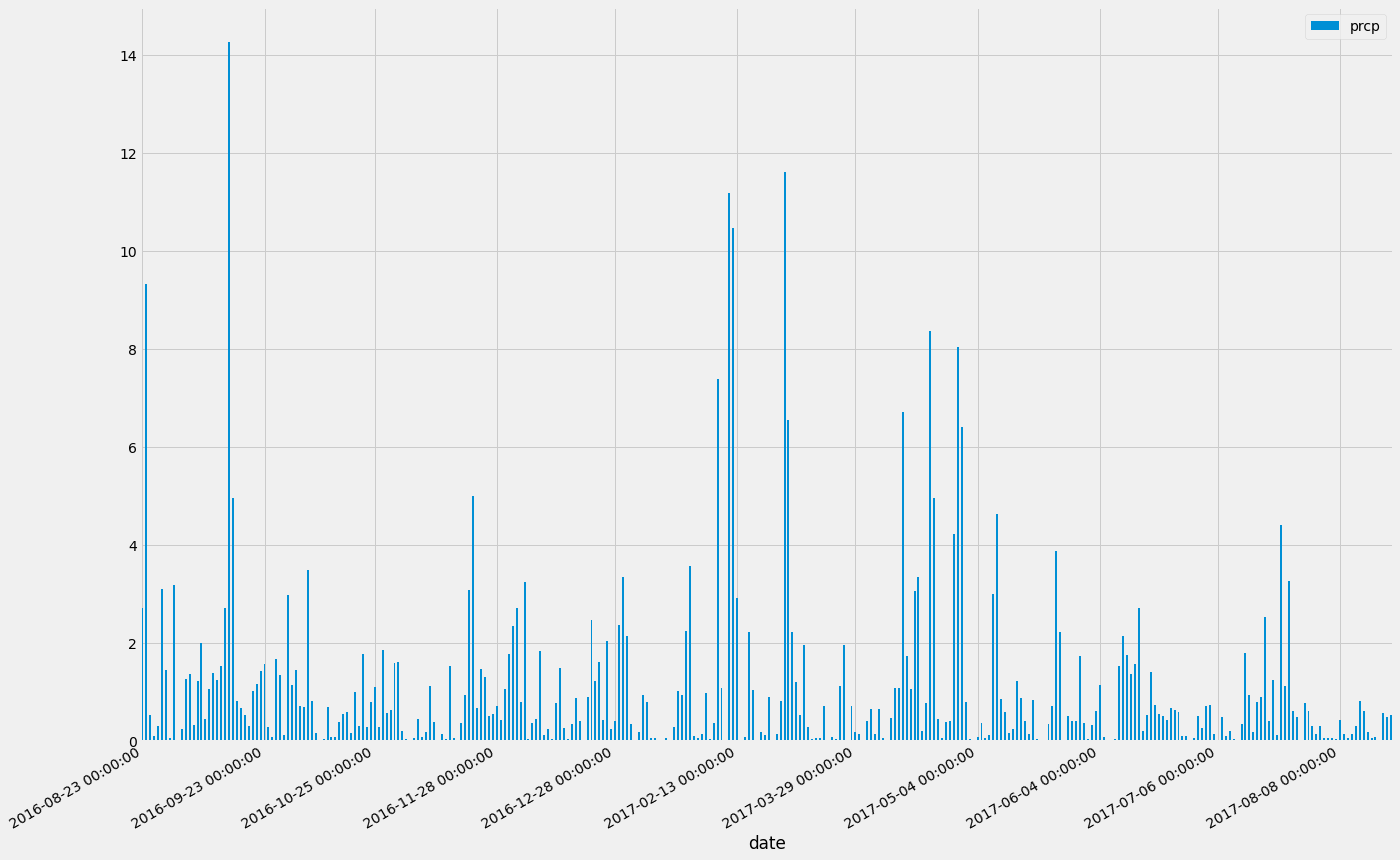

In [143]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
#date_last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
#print('date one year ago: ',date_last_year)

# Perform a query to retrieve the data and precipitation scores
precips = session.query(Measurement.date, func.sum(Measurement.prcp)).filter((Measurement.date >= date_last_year) & \
                                                         (Measurement.prcp != "None") & \
                                                         (Measurement.prcp != "0.0")).\
group_by(Measurement.date).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(precips, columns=['date', 'prcp'])
# Convert date column from string to datetime
df['date'] = pd.to_datetime(df['date'])

df.set_index('date', inplace=True)



# Sort the dataframe by date
df.sort_values('date', inplace=True)


#df.head(39)

# Use Pandas Plotting with Matplotlib to plot the data

#fig = plt.subplot(figsize(12,6))

#plt.xticks(np.arange(np.datetime64("2017-07-15"), np.datetime64("2017-08-23"), np.timedelta64(5, 'D')))



ax = df.plot(kind='bar', figsize=(20,15))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.gcf().autofmt_xdate()

plt.show()





In [96]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,318.000000
mean,1.126667
std,1.861776
min,0.010000
25%,0.130000
50%,0.525000
75%,1.237500
max,14.280000


# Exploratory Station Analysis

In [81]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(Station).distinct(Station.station).count()
#for stat in stations:
print(stations)

9


/var/folders/jc/lj3w38pd0l1bz1zn9v72dx8h0000gn/T/ipykernel_982/3466993634.py:2: SADeprecationWarning: DISTINCT ON is currently supported only by the PostgreSQL dialect.  Use of DISTINCT ON for other backends is currently silently ignored, however this usage is deprecated, and will raise CompileError in a future release for all backends that do not support this syntax.
  stations = session.query(Station).distinct(Station.station).count()


In [94]:
temp = session.query(Measurement).first()
print(temp.tobs)

65.0


In [144]:
Station.__table__.columns.keys()

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']

In [146]:
s_list = session.query(Station.station, Station.name).order_by(Station.station).all()
#print(s_list)
for s in s_list:
    print(f"{s.station} {s.name}")

USC00511918 HONOLULU OBSERVATORY 702.2, HI US
USC00513117 KANEOHE 838.1, HI US
USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US
USC00516128 MANOA LYON ARBO 785.2, HI US
USC00517948 PEARL CITY, HI US
USC00518838 UPPER WAHIAWA 874.3, HI US
USC00519281 WAIHEE 837.5, HI US
USC00519397 WAIKIKI 717.2, HI US
USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US


In [85]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_obs = session.query(Measurement.station, func.count(Measurement.id)).group_by(Measurement.station).order_by((func.count(Measurement.id)).desc()).all()

for each in station_obs:
    print(each)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [95]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [Measurement.station,
      func.min(Measurement.tobs),
      func.max(Measurement.tobs),
      func.avg(Measurement.tobs)]
top_observe_stats = session.query(*sel).\
    filter(Measurement.station == 'USC00519281').all()
top_observe_stats

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

array([[<AxesSubplot:title={'center':'tobs'}>]], dtype=object)

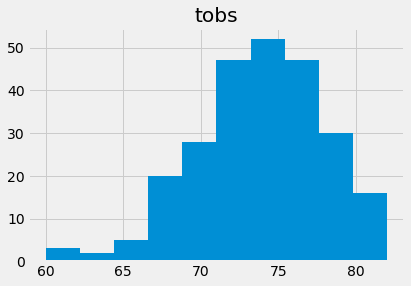

In [105]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps = session.query(Measurement.tobs).filter((Measurement.date >= date_last_year) & \
                                                         (Measurement.prcp != "None") & \
                                                         (Measurement.prcp != "0.0") & \
                                                         (Measurement.station == 'USC00519281')).\
all()

#print(type(temps))

temp_df = pd.DataFrame(temps)


temp_df.hist()
# Convert date column from string to datetime
#df['date'] = pd.to_datetime(df['date'])

#df.set_index('date', inplace=True)

# Close session

In [106]:
# Close Session
session.close()